In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [6]:
all_data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"

In [7]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection

brain_tumor_dataset  no  yes


In [8]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/no

'1 no.jpeg'  '26 no.jpg'  '41 no.jpg'	 N15.jpg    No16.jpg	 'no 89.jpg'
'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg    No17.jpg	 'no 9.png'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg    No18.jpg	 'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG    No19.jpg	 'no 91.jpeg'
'13 no.jpg'  '3 no.jpg'   '45 no.jpg'	 N2.JPG     No20.jpg	 'no 92.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG    No21.jpg	 'no 923.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg    No22.jpg	 'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG   'no 1.jpg'	 'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG   'no 10.jpg'	 'no 96.jpg'
'19 no.jpg'  '34 no.jpg'  '5 no.jpg'	 N3.jpg    'no 100.jpg'  'no 97.jpg'
'2 no.jpeg'  '35 no.jpg'  '50 no.jpg'	 N5.jpg    'no 2.jpg'	 'no 98.jpg'
'20 no.jpg'  '36 no.jpg'  '6 no.jpg'	 N6.jpg    'no 3.jpg'	 'no 99.jpg'
'21 no.jpg'  '37 no.jpg'  '7 no.jpg'	 No11.jpg  'no 4.jpg'	  no.jpg
'22 no.jpg'  '38 no.jpg'  '8 no.jpg'	 No12.jpg  'no 5.jpeg'
'2

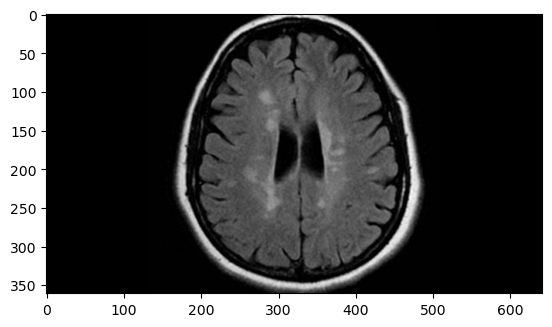

In [9]:
img = mpimg.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 8.jpg")
plt.imshow(img)

In [10]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
img.shape

(361, 642, 3)

In [12]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (444, 468, 3)


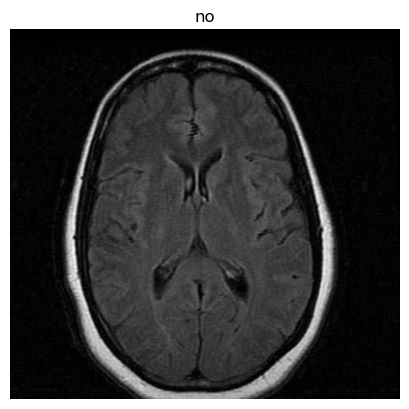

In [13]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="no")

Image shape: (630, 628, 3)


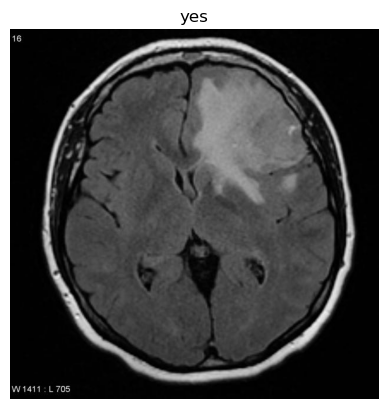

In [14]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="yes")

In [15]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [16]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [17]:
test_data

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(64, activation="relu"), 
  tf.keras.layers.Dense(32, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [19]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [20]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 39s 5s/step - loss: 0.6131 - accuracy: 0.6087 - val_loss: 0.5445 - val_accuracy: 0.7470
Epoch 2/50
8/8 [==============================] - 37s 5s/step - loss: 0.6459 - accuracy: 0.6877 - val_loss: 0.5426 - val_accuracy: 0.7708
Epoch 3/50
8/8 [==============================] - 36s 5s/step - loss: 0.5567 - accuracy: 0.7510 - val_loss: 0.5142 - val_accuracy: 0.7549
Epoch 4/50
8/8 [==============================] - 36s 5s/step - loss: 0.5442 - accuracy: 0.7747 - val_loss: 0.5188 - val_accuracy: 0.7549
Epoch 5/50
8/8 [==============================] - 37s 5s/step - loss: 0.5178 - accuracy: 0.7668 - val_loss: 0.4710 - val_accuracy: 0.7905
Epoch 6/50
8/8 [==============================] - 37s 5s/step - loss: 0.5130 - accuracy: 0.7668 - val_loss: 0.4848 - val_accuracy: 0.7628
Epoch 7/50
8/8 [==============================] - 37s 5s/step - loss: 0.4966 - accuracy: 0.8024 - val_loss: 0.4657 - val_accuracy: 0.8024
Epoch 8/50
8/8 [==================

In [21]:
model.evaluate(test_data)

8/8 [==============================] - 7s 834ms/step - loss: 0.0563 - accuracy: 0.9842


[0.056267883628606796, 0.9841897487640381]

<Axes: >

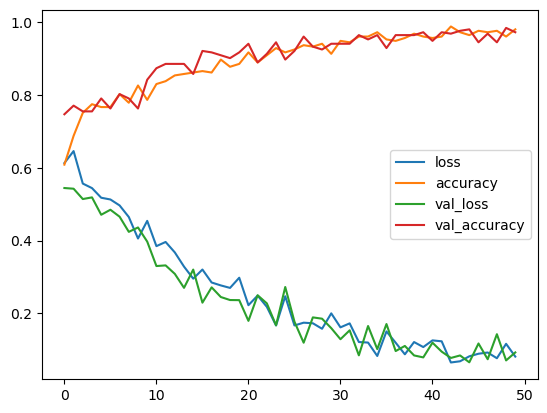

In [22]:
pd.DataFrame(model_history.history).plot()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    